# Trabajo Final de la Semana 1




## Actividad 1
## Resolución


### 1: Utilizar el dataset Iris que se puede cargar automáticamente con la biblioteca sklearn.datasets

In [1]:
import sklearn
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
Y = iris.target
print (X.shape, Y.shape)

labels = ["Setosa","Versicolour", "Virginica"]
colors = ["red","blue","green"]

(150, 4) (150,)


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
#Función de utilidad para dibujar subclases
def plot_scatter_classes(X, Y, labels, colors):
    C = []
    for label in labels:
        selection = Y==label
        C.append(X[selection])
    for idx, subset in enumerate(C):
        plt.scatter(subset[:,0], subset[:,1], color=colors[idx], label=labels[idx])
    plt.legend()

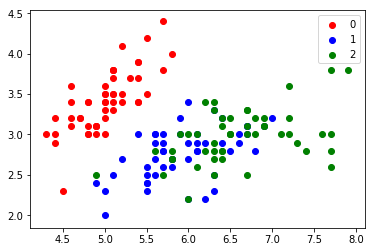

In [3]:
plot_scatter_classes(X, Y, [0,1,2], colors)

## 2: Utilizar varias configuraciones (al menos tres) del clasificador SVC, evaluarlas y compararlas sin hacer validación cruzada.

Vamos a utilizar tres tipos de kernel del clasificador SVC: 
- Linear
- Rbf
- Polynomial

___Linear:___

Para este modelo vamos a cargar el modelo, entrenar con todo su set de datos y testearlo con lo mismo.

In [5]:
#importando el modelo
from sklearn.svm import SVC
#instanciando el modelo
model =SVC(kernel="linear")
#entrenando el modelo
predict_svc = model.fit(X,Y);
#realizando la prediccion
y_predict  =  predict_svc.predict(X)

Evaluo el modelo, para esto utilizamos el objeto de metricas para evaluar distintas metricas de nuestro modelo.

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [7]:
#Matriz de confusion
confusion_matrix(y_true= Y, y_pred= y_predict)

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  0, 50]], dtype=int64)

In [9]:
print("Score del modelo: ", model.score(X, Y))
print("Accuracy del modelo: ", accuracy_score(y_true= Y, y_pred= y_predict))

Score del modelo:  0.993333333333
Accuracy del modelo:  0.993333333333


___RBF:___

Para este modelo con la configuración RBF vamos a entrenar y testearlo el modelo con todo su set de datos.

In [10]:
#importando el modelo
from sklearn.svm import SVC
#instanciando el modelo  , rbf es el valor por defecto del SVC
model =SVC(kernel="rbf")
#entrenando el modelo
predict_svc = model.fit(X,Y);
#realizando la prediccion
y_predict  =  predict_svc.predict(X)

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [12]:
confusion_matrix(y_true= Y, y_pred= y_predict)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  0, 50]], dtype=int64)

In [13]:
print("Score del modelo: ",model.score(X, Y))
print("Accuracy del modelo: ", accuracy_score(y_true= Y, y_pred= y_predict))

Score del modelo:  0.986666666667
Accuracy del modelo:  0.986666666667


___POLY:___

Para este modelo con la configuración Poly vamos a entrenar y testearlo el modelo con todo su set de datos.

In [14]:
#importando el modelo
from sklearn.svm import SVC
#instanciando el modelo
model =SVC(kernel="poly")
#entrenando el modelo
predict_svc = model.fit(X,Y);
#realizando la prediccion
y_predict  =  predict_svc.predict(X)

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [16]:
confusion_matrix(y_true= Y, y_pred= y_predict)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]], dtype=int64)

In [17]:
print("Score del modelo: ",model.score(X, Y))
print("Accuracy del modelo: ", accuracy_score(y_true= Y, y_pred= y_predict))

Score del modelo:  0.98
Accuracy del modelo:  0.98


## 3:  Tomar las configuraciones elegidas anteriormente y volver a entrenarlas y evaluarlas utilizando validación cruzada.

vamos a segmentar nuestra data, para poder sacar una data de muestra, y sobre dataset testearla.

In [18]:
#from sklearn import cross_validation
#X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, Y, test_size=0.3, random_state=0)
# cambio de libreria cross_validation por model_selection, debido a que se dejara de usar
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection .train_test_split(X, Y, test_size=0.35, random_state=0)

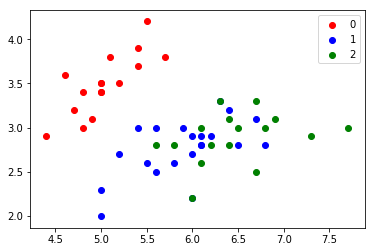

In [19]:
#pintamos la distribucion del dataset de test, para validar que no existan posibles problemas
plot_scatter_classes(X_test, y_test, [0,1,2], ["red", "blue", "green"])

In [38]:
#importando el modelo
from sklearn.svm import SVC
#instanciando el modelo
model_linear =SVC(kernel="linear")
model_rbf =SVC(kernel="rbf", gamma=0.7)
model_poly =SVC(kernel="poly", degree=3)
#entrenando el modelo
predict_svc_linear = model_linear.fit(X_train,y_train);
predict_svc_rbf = model_rbf.fit(X_train,y_train);
predict_svc_poly = model_poly.fit(X_train,y_train);
#realizando la prediccion
y_predict_linear  =  predict_svc_linear.predict(X_test)
y_predict_rbf  =  predict_svc_rbf.predict(X_test)
y_predict_poly  =  predict_svc_poly.predict(X_test)


In [39]:
print("Datos de Entrenamiento: ")
print("SVC Score - Linear : ",model_linear.score(X_train, y_train))
print("SVC Score - Rbf : ",model_rbf.score(X_train, y_train))
print("SVC Score - Poly : ",model_poly.score(X_train, y_train))
print("====================================================")
print("Datos de Testing: ")
print("SVC Score - Linear : ",model_linear.score(X_test, y_test))
print("SVC Score - Rbf : ",model_rbf.score(X_test, y_test))
print("SVC Score - Poly : ",model_poly.score(X_test, y_test))


Datos de Entrenamiento: 
SVC Score - Linear :  0.989690721649
SVC Score - Rbf :  0.979381443299
SVC Score - Poly :  0.989690721649
Datos de Testing: 
SVC Score - Linear :  0.981132075472
SVC Score - Rbf :  0.981132075472
SVC Score - Poly :  0.962264150943


Como visualizar los 4 de las caracteristicas del modelo, tomando como referencia la documentacion de sklearn:

http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html#sphx-glr-auto-examples-svm-plot-iris-py

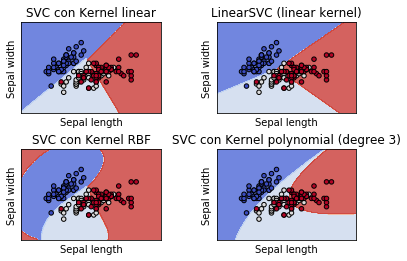

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (model_linear,
          svm.LinearSVC(C=C),
          model_rbf,
          model_poly)
#models = (svm.SVC(kernel='linear', C=C),
#          svm.LinearSVC(C=C),
#          svm.SVC(kernel='rbf', gamma=0.7, C=C),
#          svm.SVC(kernel='poly', degree=3, C=C))

models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC con Kernel linear',
          'LinearSVC (linear kernel)',
          'SVC con Kernel RBF',
          'SVC con Kernel polynomial (degree 3)')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    #print(plt.cm.coolwarm)
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.show()

## 4. Comparar los resultados de los puntos (2) y (3) y dar una opinión sobre qué modelo parece ser más adecuado. 

- Realizar los datos sobre todo el dataset es incorrecto debido a que el modelo cuando se entrene va realizar un overfiting, y para cuando de los resultados con dataset nuevo, va tener otro score. 


# Actividad 2

## 1: Crear un problema de clasificación utilizando la biblioteca sklearn.datasets, que tenga cinco características, dos de ellas redundantes.

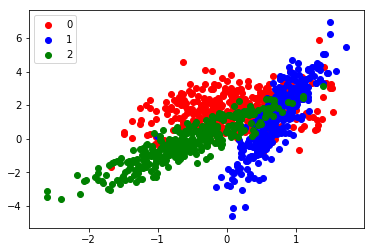

In [54]:
import sklearn
from sklearn.datasets import make_classification

import matplotlib.pyplot as plt
%matplotlib inline
#Función de utilidad para dibujar subclases
def plot_scatter_classes(X, Y, labels, colors):
    C = []
    for label in labels:
        selection = Y==label
        C.append(X[selection])
    for idx, subset in enumerate(C):
        plt.scatter(subset[:,0], subset[:,1], color=colors[idx], label=labels[idx])
    plt.legend()


X, Y = sklearn.datasets.make_classification(n_samples = 1000, n_features=5, n_redundant=2, 
                                            n_informative=3, n_classes=3,
                                            n_clusters_per_class=1)

plot_scatter_classes(X, Y, [0,1,2], ["red", "blue", "green"])

## 2: Utilizar varias configuraciones de un árbol de clasificación para crear un modelo, teniendo en cuenta el número de niveles del árbol (puede encontrarse en la documentación de los parámetros de creación del árbol). Exportar a imagen los árboles resultantes e incluirlos en el Notebook

Tomo como referencia la documentacion de la libreria sklearn:

http://scikit-learn.org/stable/modules/tree.html#classification

In [55]:
#importando el modelo
from sklearn import tree
#instanciando el modelo
model = tree.DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=7)
#entrenando el modelo
predict_decision = model.fit(X,Y);
#realizando la prediccion
y_predict  =  predict_decision.predict(X)


In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

confusion_matrix(y_true= Y, y_pred= y_predict)

array([[231,  89,  17],
       [  4, 325,   1],
       [ 42,  40, 251]], dtype=int64)

In [57]:
model.score(X, Y)

0.80700000000000005

In [58]:
import graphviz 
feature_names=["feat1","feat2","feat3","feat4","feat5"]
target_names = ["Piedra","Papel","Tijera"]

#dot_data = tree.export_graphviz(model, out_file=None) 
dot_data = tree.export_graphviz(model, out_file=None, 
                         feature_names=feature_names,  
                         class_names=target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  

graph = graphviz.Source(dot_data) 
graph.render("decision") 

'decision.pdf'

![EC2 Logo](images/decisiontree1.png)

## 3: Evaluar esas configuraciones con y sin validación cruzada, y dar una opinión razonada sobre cuál parece ser mejor modelo. 

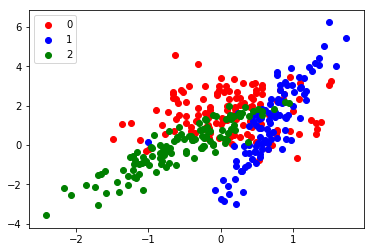

In [95]:
#from sklearn import cross_validation
#X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, Y, test_size=0.3, random_state=0)
# cambio de libreria cross_validation por model_selection, debido a que se dejara de usar
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection .train_test_split(X, Y, test_size=0.35, random_state=0)

#pintamos la distribucion del dataset de test, para validar que no existan posibles problemas
plot_scatter_classes(X_test, y_test, [0,1,2], ["red", "blue", "green"])

In [105]:
# Entrenamos y evaluamos sobre los conjuntos de prueba:
name_models = ["Arbol Decision 4", "Arbol Decision 4", "Arbol Decision 4", "Arbol Decision 4"]
models = (tree.DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=4),
          tree.DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=5),
          tree.DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=7),
          tree.DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=9))

models = (clf.fit(X_train, y_train) for clf in models)

for nmodel in models:
    print("Evaluacion ", nmodel.score(X_train, y_train), " Entrenamiento: ",nmodel.score(X_test, y_test))
    

Evaluacion  0.796923076923  Entrenamiento:  0.748571428571
Evaluacion  0.812307692308  Entrenamiento:  0.74
Evaluacion  0.830769230769  Entrenamiento:  0.768571428571
Evaluacion  0.864615384615  Entrenamiento:  0.782857142857


## 4: Utilizar un algoritmo de selección de características k-best para tratar de identificar las “mejores” características.

He tomado como referencia la ayuda que ofrece la libreia sklearn :

http://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection

In [90]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
nX = sel.fit_transform(X)

In [91]:
nX[:5]

array([[-0.36681867,  2.01771261, -0.66358596,  2.35606251, -1.27505873],
       [ 0.5651334 ,  1.81468551, -1.26372641, -0.26102818, -1.21152001],
       [-0.00875402,  0.40797487, -1.16362058,  0.1640456 ,  0.41627631],
       [-1.47107662, -2.46457467, -0.02771761,  1.90524606,  3.26633909],
       [-0.7471434 ,  0.50018376, -1.07799262,  2.13108646,  0.7021413 ]])

In [92]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

print(X.shape)

tr = SelectKBest(f_classif, k=3)
X_new = tr.fit_transform(X, Y)
print(X_new.shape)

# ¿Qué características se han eliminado? Las marcadas con True en:
tr.get_support()

(1000, 5)
(1000, 3)


array([ True, False, False,  True,  True], dtype=bool)

Se descarta las caracteristicas redundantes.

## 5: Re-entrenar los modelos con sólo las características seleccionadas, evaluarlas con validación cruzada y comparar los resultados entre los diferentes modelos y con los que se utilizaron sin selección de características.

In [93]:
from sklearn import cross_validation

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_new, Y, test_size=0.35, random_state=0)

# Re-entrenamos y evaluamos sobre los conjuntos de prueba:
models = (tree.DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=4),
          tree.DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=5),
          tree.DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=7),
          tree.DecisionTreeClassifier(criterion="entropy", max_leaf_nodes=9))

models = (clf.fit(X_train, y_train) for clf in models)

print("Evaluación sobre los mismos datos de entrenamiento")
for nmodel in models:
    print("Evaluacion ", nmodel.score(X_train, y_train), " Entrenamiento: ",nmodel.score(X_test, y_test))

Evaluación sobre los mismos datos de entrenamiento
Evaluacion  0.796923076923  Entrenamiento:  0.748571428571
Evaluacion  0.816923076923  Entrenamiento:  0.762857142857
Evaluacion  0.816923076923  Entrenamiento:  0.762857142857
Evaluacion  0.836923076923  Entrenamiento:  0.754285714286


### Conclusiones:

- Es importante en trabajar en una limpieza de datos
- Cross validation es muy importante
- El gran volumen de informacion permite entrenar mejor el modelo